In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

def create_csv(filepath):
    data =  []
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            data.append(val)
    df = pd.DataFrame(data=data,index=None)
    df.to_csv("letter_recognition.csv",index=False)
    return df

# data = create_csv("/content/letter-recognition (1).data")
data = pd.read_csv("/content/letter_recognition.csv").drop(['Unnamed: 0'],axis=1)
print(data.shape)

# print(data)
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

X = data.iloc[:,1:].values.astype(np.float32)
Y = data.iloc[:,0].values


label_encoder.fit(Y)
Y = label_encoder.transform(Y).reshape(-1,1)

one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder.fit(Y)
Y = one_hot_encoder.transform(Y).toarray().astype(np.float32)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_train,Y_train,test_size=0.2, random_state=21)

np.save("X_train.npy",X_train)
np.save("Y_train.npy",Y_train)
np.save("X_valid.npy",X_valid)
np.save("Y_valid.npy",Y_valid)
np.save("X_test.npy",X_test)
np.save("Y_test.npy",Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)



X_train = X_train.T
Y_train = Y_train.T
X_valid = X_valid.T
Y_valid = Y_valid.T
X_test = X_test.T
Y_test = Y_test.T

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)


#layers_list = dict()
h1 = 32
h2 = 64
h3 = 64

def relu_Xavier(a):
  return np.sqrt(2/a)

def tanh_Xavier(a):
  return np.sqrt(1/a)

def initialize_parameters(X,Y): 

    W1 = np.random.randn(h1, X.shape[0])*relu_Xavier(X.shape[0])#tanh_Xavier(X.shape[0]) #
    B1 = np.ones((h1, 1))
    W2 = np.random.randn(h2, h1)*relu_Xavier(h1) #tanh_Xavier(h1) #  
    B2 = np.ones((h2, 1))
    W3 = np.random.randn(h3, h2)*relu_Xavier(h2) #tanh_Xavier(h2) #
    B3 = np.ones((h3, 1))
    W4 = np.random.randn(Y.shape[0], h3)*relu_Xavier(h3) #tanh_Xavier(h3) #
    B4 = np.ones((Y.shape[0], 1))
    
    params = {
        "W1" : W1,
        "B1" : B1,
        "W2" : W2,
        "B2" : B2,
        "W3" : W3,
        "B3" : B3,
        "W4" : W4,
        "B4" : B4
    }
    
    return params

def initialize_v_s(X,Y):
  
    v_dW1,v_dB1,s_dW1,s_dB1 = np.zeros((h1, X.shape[0])),np.zeros((h1, 1)),np.zeros((h1, X.shape[0])),np.zeros((h1, 1))
    v_dW2,v_dB2,s_dW2,s_dB2 = np.zeros((h2, h1)),np.zeros((h2, 1)),np.zeros((h2,h1)),np.zeros((h2, 1))
    v_dW3,v_dB3,s_dW3,s_dB3 = np.zeros((h3, h2)),np.zeros((h3, 1)),np.zeros((h3, h2)),np.zeros((h3, 1))
    v_dW4,v_dB4,s_dW4,s_dB4 = np.zeros((Y.shape[0],h3)),np.zeros((Y.shape[0], 1)),np.zeros((Y.shape[0], h3)),np.zeros((Y.shape[0], 1))


    v_s = {
      "v_dW4" : v_dW4,
      "v_dB4" : v_dB4,
      "s_dW4" : s_dW4,
      "s_dB4" : s_dB4,
        
      "v_dW3" : v_dW3,
      "v_dB3" : v_dB3,
      "s_dW3" : s_dW3,
      "s_dB3" : s_dB3,
      
      "v_dW2" : v_dW2,
      "v_dB2" : v_dB2,
      "s_dW2" : s_dW2,
      "s_dB2" : s_dB2,
      
      "v_dW1" : v_dW1,
      "v_dB1" : v_dB1,
      "s_dW1" : s_dW1,
      "s_dB1" : s_dB1
    }

    return v_s

def tanh(a):
    return np.tanh(a)

def relu(a):
    return np.maximum(a, 0)

def softmax(a):
    expX = np.exp(a)
    return expX/np.sum(expX, axis = 0)


def forward(X,params):

  W1 = params['W1']
  B1 = params['B1']
  W2 = params['W2']
  B2 = params['B2']
  W3 = params['W3']
  B3 = params['B3']
  W4 = params['W4']
  B4 = params['B4']


  Z1 = np.dot(W1,X)+B1
  A1 = relu(Z1)#tanh(Z1)

  Z2 = np.dot(W2,A1)+B2
  A2 = relu(Z2)#tanh(Z2)

  Z3 = np.dot(W3,A2)+B3
  A3 = relu(Z3)#tanh(Z3)

  Z4 = np.dot(W4,A3)+B4
  A4 = softmax(Z4)

  forward_cache = {
      'Z1':Z1,
      'A1':A1,
      'Z2':Z2,
      'A2':A2,
      'Z3':Z3,
      'A3':A3,
      'Z4':Z4,
      'A4':A4,
  }

  return forward_cache



def cost_function(A4,y):
  m = y.shape[1]
  cost = -(1/m)*np.sum(y*np.log(A4))
  return cost


def derivative_tanh(a):
    return (1 - np.power(np.tanh(a), 2))

def derivative_relu(a):
    return np.array(a > 0, dtype = np.float32)



def backprop(x,y,params,forward_cache):
  W1 = params['W1']
  B1 = params['B1']
  W2 = params['W2']
  B2 = params['B2']
  W3 = params['W3']
  B3 = params['B3']
  W4 = params['W4']
  B4 = params['B4']
  
  A1 = forward_cache['A1']
  A2 = forward_cache['A2']
  A3 = forward_cache['A3']
  A4 = forward_cache['A4']

  m = x.shape[1]

  dZ4 = A4-y
  dW4 = (1/m)*np.dot(dZ4,A3.T)
  dB4 = (1/m)*np.sum(dZ4,axis=1,keepdims=True)

  dZ3 = np.dot(W4.T,dZ4)*derivative_relu(A3) #derivative_tanh(A3) #
  dW3 = (1/m)*np.dot(dZ3,A2.T)
  dB3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)

  dZ2 = np.dot(W3.T,dZ3)*derivative_relu(A2) #derivative_tanh(A2) #
  dW2 = (1/m)*np.dot(dZ2,A1.T)
  dB2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)

  dZ1 = np.dot(W2.T,dZ2)*derivative_relu(A1) #derivative_tanh(A1) #
  dW1 = (1/m)*np.dot(dZ1,x.T)
  dB1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)


  gradients = {
        "dW4" : dW4,
        "dB4" : dB4,
        "dW3" : dW3,
        "dB3" : dB3,
        "dW2" : dW2,
        "dB2" : dB2,
        "dW1" : dW1,
        "dB1" : dB1
    }

  # print("gradients:")
  # print("dW1:",dW1,"\ndW2:",dW2,"\ndW3:",dW3,"\ndW4:",dW4)

  return gradients


def update_parameters(params,v_s,gradients, learning_rate,beta1,beta2,epsilon,batch_no,t):

    W4 = params['W4']
    B4 = params['B4']
    W3 = params['W3']
    B3 = params['B3']    
    W2 = params['W2']
    B2 = params['B2']
    W1 = params['W1']
    B1 = params['B1']
    # print("received:")
    # print("W1:",W1,"\nW2:",W2,"\nW3:",W3,"\nW4:",W4)

    dW4 = gradients['dW4']
    dB4 = gradients['dB4']
    dW3 = gradients['dW3']
    dB3 = gradients['dB3']
    dW2 = gradients['dW2']
    dB2 = gradients['dB2']
    dW1 = gradients['dW1']
    dB1 = gradients['dB1']

    v_dW4 = v_s['v_dW4']
    v_dB4 = v_s['v_dB4']
    s_dW4 = v_s['s_dW4']
    s_dB4 = v_s['s_dB4']
    v_dW3 = v_s['v_dW3']
    v_dB3 = v_s['v_dB3']
    s_dW3 = v_s['s_dW3']
    s_dB3 = v_s['s_dB3']
    v_dW2 = v_s['v_dW2']
    v_dB2 = v_s['v_dB2']
    s_dW2 = v_s['s_dW2']
    s_dB2 = v_s['s_dB2']
    v_dW1 = v_s['v_dW1']
    v_dB1 = v_s['v_dB1']
    s_dW1 = v_s['s_dW1']
    s_dB1 = v_s['s_dB1']


    # print("dW1:",dW1,"\ndW2:",dW2,"\ndW3:",dW3,"\ndW4:",dW4)
    # print("batch_no:",batch_no)

    v_dW4 = beta1*v_dW4 + (1-beta1)*dW4
    v_dB4 = beta1*v_dB4 + (1-beta1)*dB4
    s_dW4 = beta2*s_dW4 + (1-beta2)*(dW4**2)
    s_dB4 = beta2*s_dB4 + (1-beta2)*(dB4**2)

    v_dW3 = beta1*v_dW3 + (1-beta1)*dW3
    v_dB3 = beta1*v_dB3 + (1-beta1)*dB3
    s_dW3 = beta2*s_dW3 + (1-beta2)*(dW3**2)
    s_dB3 = beta2*s_dB3 + (1-beta2)*(dB3**2)

    v_dW2 = beta1*v_dW2 + (1-beta1)*dW2
    v_dB2 = beta1*v_dB2 + (1-beta1)*dB2
    s_dW2 = beta2*s_dW2 + (1-beta2)*(dW2**2)
    s_dB2 = beta2*s_dB2 + (1-beta2)*(dB2**2)

    v_dW1 = beta1*v_dW1 + (1-beta1)*dW1
    v_dB1 = beta1*v_dB1 + (1-beta1)*dB1
    s_dW1 = beta2*s_dW1 + (1-beta2)*(dW1**2)
    s_dB1 = beta2*s_dB1 + (1-beta2)*(dB1**2)

    v_dW4_corr = v_dW4/(1-beta1**t)
    v_dB4_corr = v_dB4/(1-beta1**t)
    s_dW4_corr = s_dW4/(1-beta2**t)
    s_dB4_corr = s_dB4/(1-beta2**t)

    v_dW3_corr = v_dW3/(1-beta1**t)
    v_dB3_corr = v_dB3/(1-beta1**t)
    s_dW3_corr = s_dW3/(1-beta2**t)
    s_dB3_corr = s_dB3/(1-beta2**t)

    v_dW2_corr = v_dW2/(1-beta1**t)
    v_dB2_corr = v_dB2/(1-beta1**t)
    s_dW2_corr = s_dW2/(1-beta2**t)
    s_dB2_corr = s_dB2/(1-beta2**t)

    v_dW1_corr = v_dW1/(1-beta1**t)
    v_dB1_corr = v_dB1/(1-beta1**t)
    s_dW1_corr = s_dW1/(1-beta2**t)
    s_dB1_corr = s_dB1/(1-beta2**t)

    W4 = W4 - learning_rate*(v_dW4_corr/(np.sqrt(s_dW4_corr)+epsilon))
    B4 = B4 - learning_rate*(v_dB4_corr/(np.sqrt(s_dB4_corr)+epsilon))
    W3 = W3 - learning_rate*(v_dW3_corr/(np.sqrt(s_dW3_corr)+epsilon))
    B3 = B3 - learning_rate*(v_dB3_corr/(np.sqrt(s_dB3_corr)+epsilon))
    W2 = W2 - learning_rate*(v_dW2_corr/(np.sqrt(s_dW2_corr)+epsilon))
    B2 = B2 - learning_rate*(v_dB2_corr/(np.sqrt(s_dB2_corr)+epsilon))
    W1 = W1 - learning_rate*(v_dW1_corr/(np.sqrt(s_dW1_corr)+epsilon))
    B1 = B1 - learning_rate*(v_dB1_corr/(np.sqrt(s_dB1_corr)+epsilon))

    # W4 = W4 - (learning_rate*v_dW4*dW4)/(np.sqrt(s_dW4)+epsilon)
    # B4 = B4 - (learning_rate*v_dB4*dB4)/(np.sqrt(s_dB4)+epsilon)
    # W3 = W3 - (learning_rate*v_dW3*dW3)/(np.sqrt(s_dW3)+epsilon)
    # B3 = B3 - (learning_rate*v_dB3*dB3)/(np.sqrt(s_dB3)+epsilon)
    # W2 = W2 - (learning_rate*v_dW2*dW2)/(np.sqrt(s_dW2)+epsilon)
    # B2 = B2 - (learning_rate*v_dB2*dB2)/(np.sqrt(s_dB2)+epsilon)
    # W1 = W1 - (learning_rate*v_dW1*dW1)/(np.sqrt(s_dW1)+epsilon)
    # B1 = B1 - (learning_rate*v_dB1*dB1)/(np.sqrt(s_dB1)+epsilon)
    
    # print("updated:")
    # print("W1:",W1,"\nW2:",W2,"\nW3:",W3,"\nW4:",W4)

    
    params = {
        "W1" : W1,
        "B1" : B1,
        "W2" : W2,
        "B2" : B2,
        "W3" : W3,
        "B3" : B3,
        "W4" : W4,
        "B4" : B4
    }

    v_s = {
        "v_dW4" : v_dW4,
        "v_dB4" : v_dB4,
        "s_dW4" : s_dW4,
        "s_dB4" : s_dB4,
         
        "v_dW3" : v_dW3,
        "v_dB3" : v_dB3,
        "s_dW3" : s_dW3,
        "s_dB3" : s_dB3,
        
        "v_dW2" : v_dW2,
        "v_dB2" : v_dB2,
        "s_dW2" : s_dW2,
        "s_dB2" : s_dB2,
        
        "v_dW1" : v_dW1,
        "v_dB1" : v_dB1,
        "s_dW1" : s_dW1,
        "s_dB1" : s_dB1
    }

    
    return params,v_s



def accuracy(inp, labels, params):
    forward_cache = forward(inp, params)
    a_out = forward_cache['A4']   
    
    a_out = np.argmax(a_out, 0)  
    labels = np.argmax(labels, 0)
    
    
    num_correct = np.sum(a_out == labels)
    num_incorrect = np.sum(a_out != labels)
    acc = (num_correct/(num_correct+num_incorrect)) * 100
    return acc,num_correct,num_incorrect


def validation_loss_calc(X_valid,Y_valid,params):
    batch_size  = 32
    num_batches = int(np.ceil(X_valid.shape[1]/batch_size))
    ctr = 0
    batch_no = 0
    running_loss_val = 0.0

    while(batch_no!=num_batches):
          batch_no += 1
          # print("batch_no:",batch_no)
        
          if batch_no == num_batches:
            forward_cache = forward(X_valid[:,ctr:], params)
            loss_val = cost_function(forward_cache['A4'], Y_valid[:,ctr:])
            running_loss_val += loss_val*(X_valid[:,ctr:].shape[1])
          
          else:
            forward_cache = forward(X_valid[:,ctr:ctr+batch_size], params)
            loss_val = cost_function(forward_cache['A4'], Y_valid[:,ctr:ctr+batch_size])
            running_loss_val += loss_val*(X_valid[:,ctr:ctr+batch_size].shape[1])
            
          ctr += batch_size
 
    epoch_val_loss = running_loss_val/float(num_batches*batch_size)

    return epoch_val_loss



def model(X,Y,X_valid,Y_valid,learning_rate,num_epochs,batch_size,beta1=0.9,beta2=0.999,epsilon=1e-8):
    
    num_batches = int(np.ceil(X.shape[1]/batch_size))
    print("num_batches:",num_batches)
    cost_list = []
    epoch_val_loss_list = []
    epoch_cost_list = []
    train_accuracy = []
    valid_accuracy = []
    t=1

    params = initialize_parameters(X,Y) 
    v_s = initialize_v_s( X,Y)
    for epoch in range(num_epochs):
      ctr = 0
      batch_no = 0
      running_loss = 0.0
      while(batch_no!=num_batches):
          batch_no += 1
          # print("batch_no:",batch_no)
        
          if batch_no == num_batches:
            forward_cache = forward(X[:,ctr:], params)
            cost = cost_function(forward_cache['A4'], Y[:,ctr:])
            gradients = backprop(X[:,ctr:], Y[:,ctr:], params, forward_cache)
            running_loss += cost*(X[:,ctr:].shape[1])
          
          else:
            forward_cache = forward(X[:,ctr:ctr+batch_size], params)
            cost = cost_function(forward_cache['A4'], Y[:,ctr:ctr+batch_size])
            gradients = backprop(X[:,ctr:ctr+batch_size], Y[:,ctr:ctr+batch_size], params, forward_cache)
            running_loss += cost*(X[:,ctr:ctr+batch_size].shape[1])
            
          params,v_s = update_parameters(params,v_s,gradients, learning_rate,beta1=beta1,beta2=beta2,epsilon=epsilon,batch_no=batch_no,t=t)
          cost_list.append(cost)
          ctr += batch_size
          t+=1

      epoch_val_loss_list.append(validation_loss_calc(X_valid,Y_valid,params))
      epoch_cost_list.append(running_loss/float(num_batches*batch_size))
      train_acc,train_num_correct,train_num_incorrect = accuracy(X, Y, params)
      valid_acc,valid_num_correct,valid_num_incorrect = accuracy(X_valid, Y_valid, params)
      train_accuracy.append(train_acc)
      valid_accuracy.append(valid_acc)
      print("epoch completed:",epoch, "loss:",running_loss/X.shape[1]," Training Accuracy",train_acc,"%"," train_num_correct:",train_num_correct," train_num_incorrect:",train_num_incorrect," Validation Accuracy",valid_acc,"%", "valid_num_correct:",valid_num_correct," valid_num_incorrect:",valid_num_incorrect)
    return params, cost_list, epoch_cost_list,train_accuracy,valid_accuracy,epoch_val_loss_list



(20000, 17)
(12800, 16)
(12800, 26)
(3200, 16)
(3200, 26)
(4000, 16)
(4000, 26)
(16, 12800)
(26, 12800)
(16, 3200)
(26, 3200)
(16, 4000)
(26, 4000)


num_batches: 400
epoch completed: 0 loss: 11.364511511195541  Training Accuracy 1.7109375 %  train_num_correct: 219  train_num_incorrect: 12581  Validation Accuracy 2.0 % valid_num_correct: 64  valid_num_incorrect: 3136
epoch completed: 1 loss: 8.155668295635964  Training Accuracy 1.5078125 %  train_num_correct: 193  train_num_incorrect: 12607  Validation Accuracy 1.65625 % valid_num_correct: 53  valid_num_incorrect: 3147
epoch completed: 2 loss: 6.5985585331712935  Training Accuracy 2.703125 %  train_num_correct: 346  train_num_incorrect: 12454  Validation Accuracy 3.0625 % valid_num_correct: 98  valid_num_incorrect: 3102
epoch completed: 3 loss: 5.6422105609526065  Training Accuracy 4.015625 %  train_num_correct: 514  train_num_incorrect: 12286  Validation Accuracy 4.28125 % valid_num_correct: 137  valid_num_incorrect: 3063
epoch completed: 4 loss: 4.993446512210538  Training Accuracy 5.3671875 %  train_num_correct: 687  train_num_incorrect: 12113  Validation Accuracy 5.46875 % valid

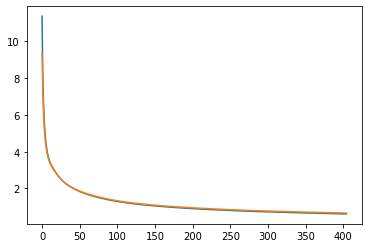

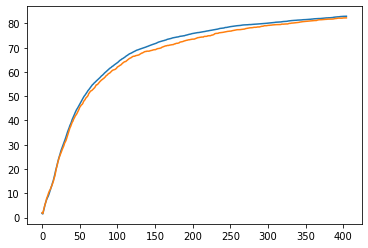

In [31]:
num_epochs = 405 #200 relu 0.0001 lr 90.92% accuracy 405 relu 0.0001 lr 93.42% accuracy
                 #200 tanh 0.0001 lr 85.37% accuracy 405 tanh 0.0001 lr 88.27% accuracy
                 #200 relu 0.00001 lr 77.82% accuracy 405 relu 0.0001 lr 81.89% accuracy 
                 #200 tanh 0.00001 lr 66.55% accuracy 405 tanh 0.0001 lr 71.30% accuracy


batch_size=32
learning_rate = 0.00001 
beta1=0.9
beta2=0.999
epsilon=1e-8

params, Cost_list, epoch_cost_list,train_accuracy,valid_accuracy,epoch_val_loss_list = model(X_train, Y_train,X_valid,Y_valid,learning_rate,num_epochs,batch_size,beta1,beta2,epsilon)

test_acc,test_num_correct,test_num_incorrect = accuracy(X_test, Y_test, params)
print(" Test Accuracy",test_acc,"%", "test_num_correct:",test_num_correct," test_num_incorrect:",test_num_incorrect)

e = np.arange(0, num_epochs)
plt.plot(e, epoch_cost_list)
plt.plot(e,epoch_val_loss_list)
plt.show()

plt.plot(e,train_accuracy)
plt.plot(e,valid_accuracy)
plt.show()